# Data Wrangling

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import pandas as pd
import pickle
import numpy as np
import sklearn
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from pandasql import *
from pandasql import sqldf
sql = lambda q: sqldf(q, globals()) 
print('This file is located in the following directory: \n'+os.getcwd())

This file is located in the following directory: 
/Users/christopherjose/BeStrong_2020


In [3]:
pd.set_option('display.max_rows', None) #show max rows in df
pd.reset_option("^display") #reset display

In [5]:
len(data)

452

In [4]:
data=pd.read_csv('/Users/christopherjose/Desktop/Work/Projects/2020/Tuck_mattress_data_2020.csv')     

In [19]:
data.head()

,Brand,Model,Offers,Price (Queen),Mattress Type,Height,Weight,Firmness,Sleep Trial
0,Nectar,Nectar Mattress,BUY NOW,799,Foam,"11""",74 lbs,6.5,365 nights
1,Saatva,Saatva Mattress,$100 OFF,1199,Innerspring,"11.5, 14.45",120 lbs,"4, 6, 7.5",120 nights
2,Brooklyn Bedding,Brooklyn Signature,20% OFF,949,Hybrid,"10""",100 lbs,"3.5, 5, 7.5",120 nights
3,Brooklyn Bedding,Brooklyn Aurora,20% OFF,1699,Hybrid,"13.5""",110 lbs,"3.5, 5, 7.5",120 nights
4,Winkbeds,WinkBed,$200 OFF,1299,Innerspring,"14.5""",135 lbs.,"4.5, 6, 7.5",120 nights


In [5]:
df1=copy.deepcopy(data).astype('str')
df1.columns=['brand', 'model', 'offers', 'price', 'type', 'height', 'weight', 'firmness', 'trial']
df1.height=df1.height.str.rstrip('""') #remove " from Height
df1.weight=df1.weight.str.rstrip('.').str.rstrip('lbs') #remove lbs. from Weight

## Sleep Trial Period - Exploration and Wrangling

### Exploration

In [585]:
df1.trial.value_counts()

100 nights                                   139
None                                          90
120 nights                                    68
90 nights                                     30
365 nights                                    30
nan                                           23
30 nights                                     17
101 nights                                    11
Lifetime (50% exchanges after 100 nights)      8
60 nights                                      8
Varies by retailer                             7
Varies by Seller                               6
120 Nights                                     3
60 Night                                       3
45 nights                                      2
1000 nights                                    2
USA, El Salvador                               1
100 night                                      1
200 nights                                     1
75 nights                                      1
Varies by Retailer  

In [622]:
df1[df1.trial.str.startswith('Life')==True] #Nest Bedding; they updated their terms to 100 nights then 30% off another NEST mattress as a final sale
df1[df1.trial.str.contains('Seller')] #Sealy contains Varies by Seller
df1[df1.brand.str.contains('Sealy')] #Other Sealy beds have None or 100 nights, i will label most as Varies by Retailer
df1.loc[df1.trial.str.contains('USA')] #Tempur luxe-adapt incorrectly has "USA, El Salvador" as sleep trial period
df1.loc[df1.brand.str.contains('Tempur')] #Other Tempurs have 90 day sleep trial period! Switch to 90 days
df1.loc[df1.trial=='nan'] #these beds are missing so much information!!! 

,brand,model,offers,price,type,height,weight,firmness,trial
303,Nest Bedding,Alexander,$100 OFF,1199,Foam,12.5,nan,"5.5, 7.5",Lifetime (50% exchanges after 100 nights)
304,Nest Bedding,Alexander Hybrid,$100 OFF,1199,Hybrid,13.5,nan,"3, 5.5, 7.5",Lifetime (50% exchanges after 100 nights)
305,Nest Bedding,Alexander Hybrid Luxury Contour,$150 OFF,1599,Hybrid,11.5,nan,5.5,Lifetime (50% exchanges after 100 nights)
306,Nest Bedding,Alexander Signature Series Flippable,0.08,1299,Foam,14,80,"Side 1: 5.5, Side 2: 7.5",Lifetime (50% exchanges after 100 nights)
307,Nest Bedding,Nest Bedding Latex Mattress,BUY NOW,$1699*,Latex,"9"" (No Topper), 12"" (Topper)",nan,"4, 5.5, 7.5",Lifetime (50% exchanges after 100 nights)
308,Nest Bedding,Love and Sleep,8% OFF,699,Foam,11,nan,"5.5, 7.5",Lifetime (50% exchanges after 100 nights)
309,Nest Bedding,Natural Hybrid Latex,$100 OFF,1499,Hybrid,13,nan,"3, 5.5, 7.5",Lifetime (50% exchanges after 100 nights)
310,Nest Bedding,Organic Hybrid Latex,0.08,3299,Hybrid,12,nan,"3,5.5,7.5",Lifetime (50% exchanges after 100 nights)


,brand,model,offers,price,type,height,weight,firmness,trial
341,Sealy Essentials,Essentials - Conform Line,BUY NOW,699,Foam,nan,nan,"3.5,5,6.5",Varies by Seller
342,Sealy Essentials,Essentials - Response Line,BUY NOW,499,Innerspring,8.5-13,nan,"3.5,5,6.5",Varies by Seller
352,Sealy Posturepedic,Performance - Conform Line,BUY NOW,1249,Foam,nan,nan,"3.5,5,6.5",Varies by Seller
353,Sealy Posturepedic,Performance - Response Line,BUY NOW,699,Innerspring,11.5-14,nan,"3.5,5,6.5",Varies by Seller
357,Sealy Posturepedic,Premium - Conform Line,BUY NOW,2099,Foam,nan,nan,"3,6.5",Varies by Seller
358,Sealy Posturepedic,Premium - Response Line,BUY NOW,1499,Innerspring,13-16,nan,"3.5,5,7.5",Varies by Seller


,brand,model,offers,price,type,height,weight,firmness,trial
131,Cocoon by Sealy,Cocoon Chill,$100 OFF,849,Foam,10,64.4,"4, 6",100 nights
132,Cocoon by Sealy,Cocoon Classic,$100 OFF,799,Foam,10,64.4,"4, 6",100 nights
341,Sealy Essentials,Essentials - Conform Line,BUY NOW,699,Foam,nan,nan,"3.5,5,6.5",Varies by Seller
342,Sealy Essentials,Essentials - Response Line,BUY NOW,499,Innerspring,8.5-13,nan,"3.5,5,6.5",Varies by Seller
343,Sealy,House Brand,BUY NOW,$330*,Innerspring,"8.5""-11.5",Avg 60,nan,None
344,Sealy Optimum,Optimum - Brassword,BUY NOW,2125,Latex,12,104,nan,None
345,Sealy Optimum,Optimum - Destiny Gold,BUY NOW,875,Foam,10,58,nan,None
346,Sealy Optimum,Optimum - Dreams,BUY NOW,1375,Latex,10,73,nan,None
347,Sealy Optimum,Optimum - Elation Gold,BUY NOW,1900,Foam,13,98,nan,None
348,Sealy Optimum,Optimum - Inspiration Gold,BUY NOW,1400,Foam,12,80,"3, 6",None


,brand,model,offers,price,type,height,weight,firmness,trial
425,Tempur-Pedic,TEMPUR-LuxeAdapt,BUY NOW,3999,Foam,13,94,"3,7","USA, El Salvador"


,brand,model,offers,price,type,height,weight,firmness,trial
34,Tempur-Pedic,TEMPUR-ProAdapt,BUY NOW,2999,Foam,12,100,"3,5,7",90 nights
39,Tempur-Pedic,TEMPUR-Adapt,BUY NOW,2199,Foam,11,79,5,90 nights
377,Tempur-Pedic,Mariela (Black),BUY NOW,$2599*,Innerspring,Varies,114,"3.5, 6, 7.5",None
418,Tempur-Pedic,TEMPUR-Legacy,BUY NOW,2299,Foam,10,73,4,90 nights
419,Tempur-Pedic,Tempur-Pedic Cloud,BUY NOW,$3099*,Foam,"11.5""-13.5",Varie,3,90 nights
420,Tempur-Pedic,Tempur-Pedic Contour,BUY NOW,$3099*,Foam,"12.5""-13.5",Varie,7,90 nights
421,Tempur-Pedic,Flex,BUY NOW,$1999*,Hybrid,"10""-12.5",Varie,Varies,90 nights
422,Tempur-Pedic,Tempur-Pedic GrandBed,BUY NOW,7499,Foam,15,nan,4,90 nights
423,Tempur-Pedic,TEMPUR-Adapt Hybrid,BUY NOW,2199,Hybrid,11,96,5,90 nights
424,Tempur-Pedic,TEMPUR-breeze,BUY NOW,4499,Foam,13,Varie,"3,7",90 nights


,brand,model,offers,price,type,height,weight,firmness,trial
68,Aireloom,Aspire,BUY NOW,nan,Hybrid,nan,nan,nan,nan
69,Aireloom,Preferred,BUY NOW,nan,Hybrid,nan,nan,nan,nan
70,Aireloom,Rip Van Winkle,BUY NOW,nan,Hybrid,nan,nan,nan,nan
71,Aireloom,Synchronized Support,BUY NOW,nan,Hybrid,nan,nan,nan,nan
134,Corsicana,Foam,BUY NOW,356,Foam,8.5,85,nan,nan
135,Corsicana,Coil,BUY NOW,$363*,Coil,"9.5""-15",Varie,nan,nan
149,Dormeo,nan,BUY NOW,nan,Foam,"10""-15.5",nan,nan,nan
159,Easy Rest,Classic,$50 OFF,nan,Innerspring,8,nan,nan,nan
160,Easy Rest,Economy,$50 OFF,nan,Foam,4,nan,nan,nan
161,Easy Rest,Harmony,$50 OFF,nan,Innerspring,13,nan,nan,nan


In [89]:
df1[df1.trial=='None'].groupby('brand').size().sort_values(ascending=False) #None value sleep trial periods is probably not true, so will investigate

brand
Signature Sleep       9
Bob-O-Pedic           8
Sealy Optimum         8
Ethan Allen           6
Englander             6
King Koil             5
Kingsdown             5
Restonic              5
Stearns & Foster      4
Duxiana               4
Diamond Mattress      4
Beautyrest Black      4
Reverie               4
Classic Brands        4
Sealy Posturepedic    3
Spring Air            3
Sleep Science         2
Tempur-Pedic          1
Ikea                  1
Nature's Sleep        1
Sealy                 1
Simmons               1
Naturepedic           1
dtype: int64

Notes on correcting brands shown that have Sleep Trial Period None values.
Tuck database seems to use sleep trial period on manufacturer website if you can buy it at their website, or else "varies by retailer" value is used. I will go with this approach in updating None values to their correct value.



1. Signature Sleep's sleep trial period varies by retailer.  It has no trial period independent of the location where it is sold at.  You can return it within 30 days at Amazon, even if you used it.  You can return it within 90 days at Walmart only if you have not opened and used it.  
2. Bob-O-Pedic's sleep trial period is 90 days.  This is indicated on their website.  In checking these, beds, I found some were discontinued since the time of Tuck's study.
3.  Sealy Optimum has been discontinued.  Sealy is sold at major retailers, however, so the sleep trial period varies by retailer.
4.  Ethan Allen mattresses are non-returnable, unless damaged, etc.  
5. Englander sleep trial varies by retailer.  
6.  Koil Koil -- varies by retailer, since it's offered at brick and mortal retail locations.
7. Kingsdown, Restonic mattresses have almost no information. I'll remove these.
8.  Stearns and Foster --varies by retailer.
9.  Duxiana has a 30 day sleep trial period, according to Tuck
10.  Diamond Mattress has a 120 sleep trial period.
11. Beautyrest Black -- Beautyrests have a 100 night sleep trial period on the manufacturer's website
12. Reverie -- None through them, though they'll work with you for a year to help you resolve problems, according to Tuck
13. Classic Brands -> No prices are shown!  product link directs to charles p rogers website with a page indicating bed discontinued.  Charles p rogers doesn't appear affiliated with classic brands.
14. Sealy Posturepedic --> Varies by retailer
15. Spring Air --> Removing entries due to: No product or review links, latex price range is off since i found a latex for over 2000 when price range only goes from 1099-1299,  If you search for "Spring Air" in the Tuck table search box, you can't find it.  Search "SpringAir".  Spring Air owns multiple brands like Back Supporter & Chattam and Wells.  Does this data include all brands? Latex for over 2000: https://www.us-mattress.com/spring-air-sunset-plush-queen.html.
16. Sleep Science -> offers 120 sleep trial period on their website
17. The Tempur-Pedic entry is actually a Beautyrest Black Bed that's been discontinued (updated in data corrections section)
18.  Ikea has 365 day sleep trial periods.  The bed in question, Hasvag, has 2 entries with different reviews, but the same information, except the entry missing the sleep trial period value has a different weight (57 lbs vs the other entry with 46 lbs).  57 lbs is the correct weightt for a queen.  46 lbs is the weight for a full size version, which we don't want to use. 
19.  Nature's Sleep link directs you to a brand called Luxi and The Luxi 3-in-1.  Review ratings seem to be for Luxi as well.  Price link button shows 250 off which is what review for Luxi mentions, but data's bed thicknesses (8-13) dont match review's thicknesses (9,11).  I will just remove this entry.  Nature's sleep does exist but it's not related to Luxi. 
20. Sealy - Varies by retailer
21. Simmons owns the beautyrest brand and also launched a now discontinued brand called beautysleep.  It was sold at different retailers.  I"m not if sure if it was sold on the manufacturer and for what sleep trial period.  I'll set at Varies by Retailer.
22.  Naturepedic --> each naturedpedic mattress has a different sleep trial period, which is interesting.  Spoke to a naturepedic representative and it's true though most now have 90 day sleep trial periods except Halycon has 120. Chorus and Serenade now have 90 day sleep trial periods however. Serenade has replaced essentials line has as slightly more budget friendly, so i'll assign essentials line a 90 day sleep trial period, just like serenade.

### Wrangling

In [6]:
df2 = df1.copy() #deep set to True, by default, [copy.deepcopy(df1), df1.copy(deep=True)] are also valid

In [7]:
#index 377 miscoded as Tempurpedic when it is a Beautyrest 
#source3 https://www.us-mattress.com/simmons-beautyrest-black-mariela-plush-queen-mattress.html
df2[(df2.brand=='Tempur-Pedic') & (df2.model=='Mariela (Black)')]
df2.iloc[377,:].brand='Beautyrest Black'

,brand,model,offers,price,type,height,weight,firmness,trial
377,Tempur-Pedic,Mariela (Black),BUY NOW,$2599*,Innerspring,Varies,114,"3.5, 6, 7.5",None


#### Edit Ikea Hasvag Mattress

In [8]:
#Two Ikea Hasvag entries.  Removing 46 lb (weight of a full size).  57 lb is weight of queen size.  Updating sleep trial on this to 365.
#https://www.ikea.com/us/en/p/hasvag-spring-mattress-medium-firm-beige-70307407/

df2.loc[(df2.brand=='Ikea') & (df2.model=='Hasvag')] #show error

df2.drop(
    df2.loc[(df2.brand=='Ikea') & (df2.model=='Hasvag')   
        & (df2.weight == '46 ')].index, inplace=True) #remove entry

df2.loc[(df2.brand=='Ikea') & (df2.model=='Hasvag'),'trial'] = 365 #update kept entry
df2.loc[(df2.brand=='Ikea') & (df2.model=='Hasvag')] #show result

,brand,model,offers,price,type,height,weight,firmness,trial
226,Ikea,Hasvag,BUY NOW,199,Innerspring,8.25,57,6,None
227,Ikea,Hasvag,BUY NOW,199,Innerspring,8.25,46,6,365 nights


,brand,model,offers,price,type,height,weight,firmness,trial
226,Ikea,Hasvag,BUY NOW,199,Innerspring,8.25,57,6,365


#### Drop mattresses

In [9]:
#Drop Spring Air b/c no product/review links, latex price range goes above maximum stated amt, no sleep trial which is probably not right
df2.loc[(df2.brand=='Spring Air')]
df2.drop(df2.loc[(df2.brand=='Spring Air')].index,inplace=True)

#Drop Nature's Sleep entry since product link shows different brand, and some info matches this brand ($250 off) but some doesn't (bed thickness)
df2.loc[(df2.brand=='Nature\'s Sleep')]
df2.drop(df2.loc[(df2.brand=='Nature\'s Sleep')].index, inplace=True)

#Drop Classic Brands; no prices, wrong product link
df2.loc[(df2.brand=='Classic Brands')]
df2.drop(df2.loc[(df2.brand=='Classic Brands')].index, inplace=True)

#Drop Kingsdown and Restronic due to lack of information
df2.loc[(df2.brand=='Kingsdown') | (df2.brand=='Restonic')]
df2.drop(df2.loc[(df2.brand=='Kingsdown') | 
                 (df2.brand=='Restonic')].index, inplace=True)

#Drop rows with trial = 'nan' since they are missing too much data
df2.drop(df2.loc[df2.trial=='nan'].index,inplace=True)

,brand,model,offers,price,type,height,weight,firmness,trial
407,Spring Air,Hybrid,BUY NOW,$819*,Hybrid,14-15,nan,nan,None
408,Spring Air,Innerspring,BUY NOW,$519*,Innerspring,14,nan,"3, 7",None
409,Spring Air,Latex,BUY NOW,$1099*,Latex,"13"" - 16.5",nan,nan,None


,brand,model,offers,price,type,height,weight,firmness,trial
295,Nature's Sleep,nan,$250 OFF,$1300*,Foam,8-13,50-135,nan,None


,brand,model,offers,price,type,height,weight,firmness,trial
127,Classic Brands,Innerspring,BUY NOW,nan,Innerspring,"7""-10",nan,nan,None
128,Classic Brands,Hybrid,BUY NOW,nan,Hybrid,"10.5""-14",55-106 lbs (80.5 avg),nan,None
129,Classic Brands,Latex,BUY NOW,nan,Latex,11,85,nan,None
130,Classic Brands,Memory Foam,BUY NOW,nan,Foam,"6""-12",45-92,nan,None


,brand,model,offers,price,type,height,weight,firmness,trial
259,Kingsdown,Intelligent,BUY NOW,nan,Airbed,nan,nan,nan,None
260,Kingsdown,Latex,BUY NOW,nan,Latex,nan,nan,nan,None
261,Kingsdown,Memory Foam,BUY NOW,nan,Foam,nan,nan,nan,None
262,Kingsdown,Hybrid,BUY NOW,nan,Hybrid,nan,nan,nan,None
263,Kingsdown,Innerspring,BUY NOW,nan,Innerspring,nan,nan,nan,None
329,Restonic,Brio,BUY NOW,nan,Foam,nan,nan,nan,None
330,Restonic,nan,BUY NOW,nan,Innerspring,nan,nan,nan,None
331,Restonic,Hybrid Signature,BUY NOW,nan,Hybrid,nan,nan,nan,None
332,Restonic,HealthRest Latex,BUY NOW,nan,Latex,nan,nan,nan,None
333,Restonic,HealthRest TempaGel,BUY NOW,nan,Foam,nan,nan,nan,None


#### Correct Sleep Trial Periods

In [10]:
#Correct sleep trial period to 'Varies by retailer'
df2.loc[(
        (df2.brand=='Signature Sleep') | 
        (df2.brand=='Englander') | 
        (df2.brand=='Sealy Optimum') |
        (df2.brand=='King Koil') |
        (df2.brand=='Stearns & Foster') |
        (df2.brand=='Sealy Posturepedic') |
        (df2.brand=='Sealy') |
        (df2.brand=='Simmons')
        ) & 
        (df2.trial=='None'), 'trial']  = 'Varies by Retailer'

#Correct sleep trial periods
df2.loc[(df2.brand=='Bob-O-Pedic') & (df2.trial=='None'),'trial'] = 90
df2.loc[(df2.brand=='Duxiana') & (df2.trial=='None'),'trial'] = 30
df2.loc[(df2.brand=='Diamond Mattress') & (df2.trial=='None'),'trial'] = 120
df2.loc[(df2.brand=='Beautyrest Black') & (df2.trial=='None'),'trial'] = 100
df2.loc[(df2.brand=='Sleep Science') & (df2.trial=='None'),'trial'] = 120
df2.loc[(df2.brand=='Naturepedic') & 
        ((df2.model=='Chorus') | 
         (df2.model=='Serenade') |
         (df2.model=='Essentials')),'trial'] = 90

In [11]:
def sleep_trial(x):
    if x == '30 nights':
        return 30
    elif x == '45 nights':
        return 45
    elif x == '60 nights':
        return 60
    elif x == '60 Night':
        return 60
    elif x == '75 nights':
        return 75
    elif x == '90 nights':
        return 90
    elif x == '100 night':
        return 100
    elif x == '100 nights':
        return 100
    elif x == '101 nights':
        return 101
    elif x == '120 nights':
        return 120
    elif x == '120 Nights':
        return 120
    elif x == '200 nights':
        return 200
    elif x == '365 nights':
        return 365
    elif x == '1000 nights':
        return 1000
    elif x == 'Lifetime (50% exchanges after 100 nights)': 
        return 100
    elif x == 'Varies by retailer':
        return 'Varies by Retailer'
    elif x == 'Varies by Seller':
        return 'Varies by Retailer'
    elif x == 'USA, El Salvador':
        return 90
    else:
        return x

In [12]:
df2.trial=df2.trial.apply(sleep_trial) #Apply function
df2.trial.value_counts()
df2.loc[df2.trial=='None'] #Double Check that Nones are Ethan & Reverie

100                   153
120                    77
Varies by Retailer     51
90                     42
365                    30
30                     19
60                     11
101                    11
None                   10
1000                    2
45                      2
75                      1
200                     1
Name: trial, dtype: int64

,brand,model,offers,price,type,height,weight,firmness,trial
188,Ethan Allen,Contempo,BUY NOW,899,Innerspring,8,nan,nan,None
189,Ethan Allen,Signature,BUY NOW,1999,Innerspring,11.5,nan,"3, 4, 7",None
190,Ethan Allen,Splendor,BUY NOW,2999,Innerspring,14.5,nan,nan,None
191,Ethan Allen,Luna,BUY NOW,2999,Foam,13.5,nan,nan,None
192,Ethan Allen,Profile,BUY NOW,1999,Foam,13.5,nan,nan,None
193,Ethan Allen,Stellar,BUY NOW,1299,Hybrid,10.5,nan,nan,None
334,Reverie,Dream Hybrid II,BUY NOW,1999,Hybrid,10,nan,"4,6,7",None
335,Reverie,Dream Supreme I Natural,BUY NOW,3149,Hybrid,11,nan,"4,6,7",None
336,Reverie,Dream Supreme II Hybrid,BUY NOW,3499,Hybrid,12,nan,"4,6,7",None
337,Reverie,Dream Supreme II Natural,BUY NOW,3499,Hybrid,12,nan,"4,6,7",None


## Firmness - Exploration and Wrangling

Below, row is given for purple 3 and purple 4.  The given price, however, is just Purple 3's price.  Purple 4, the softest Purple, is more expensive and has been for awhile.
This data set can have multiple mattresses within a product line in each row.  The row then provides summary statistics for mattresses within that product line.  I have several options here:
1. a) Take the avg/median value within the ranges provided and use this for entries consisting of more than one mattress.  
b) Make a binary predictor indicating these rows are aggregated.
2. Do a ton of internet investigating, manual entry, and split out these rows to get one mattress per row

I'll pursue option #1 for now.  Effectively, some rows will contain aggregated mattress information for certain brands.

In [13]:
df2.loc[df2.brand.str.contains('Purple')]

,brand,model,offers,price,type,height,weight,firmness,trial
11,Purple,Purple Mattress,BUY NOW,999,Foam,9.5,110,6.5,100
53,Purple,Purple Hybrid,BUY NOW,1449,Hybrid,11,122,6.5,100
54,Purple,Hybrid Premier,BUY NOW,2199,Hybrid,"12"" or 13",145-168,"4.5,5.5",101


Below, Reverie mattresses have adjustable firmnesses, so each entry is just for one mattress. <br>
The Luft entry is for 3 different mattresses with different firmnesses: plush (soft), luxury firm (medium or between medium and firm), and firm (firm).  The price for each is now $1399, however.  

In [14]:
df2.loc[df2.firmness=='4,6,7']

,brand,model,offers,price,type,height,weight,firmness,trial
279,Luft,The Luft Bed,BUY NOW,1099,Hybrid,13.5,100-150,"4,6,7",100
334,Reverie,Dream Hybrid II,BUY NOW,1999,Hybrid,10,nan,"4,6,7",None
335,Reverie,Dream Supreme I Natural,BUY NOW,3149,Hybrid,11,nan,"4,6,7",None
336,Reverie,Dream Supreme II Hybrid,BUY NOW,3499,Hybrid,12,nan,"4,6,7",None
337,Reverie,Dream Supreme II Natural,BUY NOW,3499,Hybrid,12,nan,"4,6,7",None


At least half the dataset has records with just one firmness, as calculated below. <br>
57 mattreses do not have firmness ratings, so perhaps a binary indicator can be used to indicate these. <br>

In [15]:
df2.firmness.value_counts().head(10)
df2.firmness.value_counts().head(10).index #get most frequent firmness values for below
len(df2.loc[df2.firmness.isin(['6', '6.5', '5.5', '5', '4', '7', '4.5', '3.5'])]) 
len(df2) 

nan       57
6         49
6.5       41
5.5       33
5         25
4         20
7         20
Varies    18
4.5       12
3.5        7
Name: firmness, dtype: int64

Index(['nan', '6', '6.5', '5.5', '5', '4', '7', 'Varies', '4.5', '3.5'], dtype='object')

207

410

### Wrangling

In [16]:
df3 = df2.copy()#.reset_index()

#df2.firmness.unique() #paste these values below
firm_update=['7-Mar','Varies', '7 (Side 1), 9 (Side 2)', '5 (2-sided only), 7', 'Varies (Adjustable)',
'Side 1: 8\nSide 2: 4', 'nan', 'Multiple firmness options', 'Side 1: 6, Side 2: 7', 'Varies (customizable)',
'Varies by model', 'Side 1: 5.5, Side 2: 7.5', 'Side 1: 4, Side 2: 7', 'Side 1:5 Side 2: 7', 'varies']

firm_mod = \
{'7-Mar':np.nan,
  'Varies':np.nan, 
  '7 (Side 1), 9 (Side 2)': '8', #avg 
  '5 (2-sided only), 7':'6',   #avg
  'Varies (Adjustable)': np.nan,
  'Side 1: 8\nSide 2: 4':6,
  'nan': np.nan,
  'Multiple firmness options':np.nan, 
  'Side 1: 6, Side 2: 7':'6.5', #avg
  'Varies (customizable)':np.nan,
  'Varies by model':np.nan, 
  'Side 1: 5.5, Side 2: 7.5':'6.5', #avg
  'Side 1: 4, Side 2: 7':'5.5',  #avg
  'Side 1:5 Side 2: 7':'6.0', #avg 
  'varies':np.nan} #avg

firm_update=df3.loc[df3.firmness.isin(firm_update)].firmness.map(firm_mod) #update firmnes-values-to-update to dictionary values
firm_update_indices=firm_update.index
df3.loc[firm_update_indices,'firmness']=firm_update
df3.loc[df3.firmness=='3.5-7.5','firmness']='3.5,7.5' #prepare data point to take avg
df3.loc[df3.firmness=='4,5.5,6.5,7.7.5']='4,5.5,6.5,7,7.5' #update denver hybird firmness typo, review page shows a 7 and 7.5 firmness rating for the hybrids
#df3.firmness=df3.firmness.str.split(','); #make lists of strings

In [17]:
#convert firmness column from '3.5, 5, 7.5' to ['3.5','5','7.5']
t=df3.firmness.str.split(',')  
t2=t.copy()

#Remove nans, convert strings to lists with #s
t_notnull=t[t.notnull()] 
t_notnull2=[[float(i) for i in row] for row in t_notnull] 
t_notnull3=[np.mean(row) for row in t_notnull2]
len(t_notnull3)+len(t[t.isnull()])==len(df3)

#make series of mean firmness and all firmnesses (as #s instead of strings)
t_notnull4_means=pd.Series(data=t_notnull3,index=t_notnull.index)  #use resultant list of means w/ correct index values 
t_notnull4_lists=pd.Series(data=t_notnull2,index=t_notnull.index)

#update series values ['3.5','5','7.5'] --> t:[mean] & t2:[3.5,5,7.5]
t[t_notnull4_means.index]=t_notnull4_means  
t2[t_notnull4_lists.index]=t_notnull4_lists

#Update df3
df3['avg_firmness']=t
df3['firmness']=t2
df3=df3.reset_index()

True

### Exploration

<b>Dataset firmness ratings</b> <br>
2-3 : soft,
4   : medium soft,
5   : medium,
6   : medium firm,
7-8 : firm,
9-10: extra firm---->source: https://www.tuck.com/mattress-firmness/
 <br> See below, most mattreses in the dataset are medium or firmer (5+). The most common firmness is medium firm.

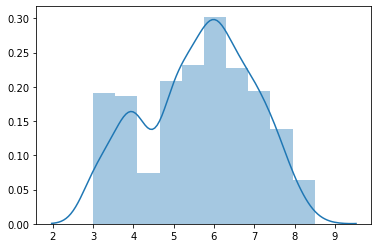

In [18]:
firmness_list=[]
t_notnull_reindex=t_notnull4_lists.reset_index(drop=True)
for row in range(len(t_notnull_reindex)):
    for entry in t_notnull_reindex[row]:
        firmness_list.append(entry)
        
sns.distplot(firmness_list,10)

The avg firmness data wipes out information on softer mattresses, which is misleading.

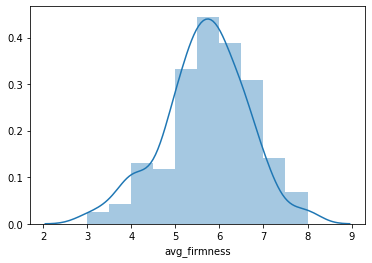

In [20]:
#Using avg firmness for rows with multiple mattresses results in more rows having closer to a medium firmness (5-6)
sns.distplot(df3.avg_firmness,bins=10) 

In [21]:
#how many entries would i have to manually work with to split out rows by firmness?--> 1/3 of the dataset.  Quite a lot. 227 rows have 1 non-NAN firmness.
t_notnull.map(len).value_counts() 

1    227
3     44
2     43
4      8
5      2
Name: firmness, dtype: int64

In [22]:
#Can I just split out the dataset and not do much manual entry? How many rows are we talking about? What do they look like? --> 97 rows
multi_firm=t_notnull.map(len)>1 #multi-firmness entries
multi_firm=multi_firm.reset_index()
multi_firm_rows=np.where(multi_firm.firmness==True) #return indices 
multi_firm_index=multi_firm.iloc[multi_firm_rows]['index'].values
multi_firm_bool=df3['index'].isin(multi_firm_index) #where criteria

In [23]:
#Can I just split out the dataset and not do much manual entry?
df3[multi_firm_bool].head() #97 rows with multiple firmnesses
print(len(df3[multi_firm_bool]),'rows with multiple firmnesses')

,index,brand,model,offers,price,type,height,weight,firmness,trial,avg_firmness
1,1,Saatva,Saatva Mattress,$100 OFF,1199,Innerspring,"11.5, 14.45",120,"[4.0, 6.0, 7.5]",120,5.83333
2,2,Brooklyn Bedding,Brooklyn Signature,20% OFF,949,Hybrid,10,100,"[3.5, 5.0, 7.5]",120,5.33333
3,3,Brooklyn Bedding,Brooklyn Aurora,20% OFF,1699,Hybrid,13.5,110,"[3.5, 5.0, 7.5]",120,5.33333
4,4,Winkbeds,WinkBed,$200 OFF,1299,Innerspring,14.5,135,"[4.5, 6.0, 7.5]",120,6
8,8,Loom & Leaf,Loom & Leaf Mattress,$100 OFF,1499,Foam,12,93,"[5.5, 8.0]",120,6.75


97 rows with multiple firmnesses


Should I split the database up by mattress or just take averages? <br>
Splitting the database will require extra work if i have to correct rows showing 1 height/weight for multiple firmnesses, if height/weight actually differs by firmness.
Many mattresses have 1 height/weight for multiple firmnesses.... is this really true? Check a sampling of mattresses.  <br>

1. Yes-Winkbed Memory Lux advertises as one height and weight for all mattresses (height=11,weight=77) on website.  This database shows (12,77).
2. Yes-Novosbed shows 11 inches for all firmnesses on website
3. Yes-Loom & Leaf is 12 inches high and 93 lbs for all firmnesses. Correct information.
4. No-Tempur Pro-Adapts are 12 inches, but queen weights are: [soft: 85lbs, medium: 92lbs, firm 89lbs, medium hybrid: 117lbs] according to tempurpedic rep
5. Kind of-Layla is a flippable mattress, where one side is firm and one side is soft.  Weight is 80lbs (wrong value of NA was entered).  
6. Yes-Eco Terra Mattress is 100lbs for both firmnesses and have same height. https://ecoterrabeds.com/products/natural-latex-hybrid-mattress?variant=26217959815
7. Ikea Haugesund - medium is tuck's stated 59.5 lb, but firm is actually 66.125 lb, as shown on website.

In [24]:
df3[df3.brand.str.contains('Avocado')]

,index,brand,model,offers,price,type,height,weight,firmness,trial,avg_firmness
64,64,Avocado Green Mattress,Avocado Green,$150 OFF,$1399*,Hybrid,"11"" (no pillow-top), 13"" (pillow-top)","97 lbs. (no pillow-top), 137 lbs. (pillow-top)","[5.0, 6.5]",365,5.75
82,86,Avocado Green Mattress,Avocado Vegan Mattress,$100 OFF,$1399*,Hybrid,"11"" (no pillow-top), 13"" (pillow-top)","97 lbs. (no pillow-top), 137 lbs. (pillow-top)","[5.0, 6.5]",100,5.75


In [25]:
df3[multi_firm_bool].head(5)

,index,brand,model,offers,price,type,height,weight,firmness,trial,avg_firmness
1,1,Saatva,Saatva Mattress,$100 OFF,1199,Innerspring,"11.5, 14.45",120,"[4.0, 6.0, 7.5]",120,5.83333
2,2,Brooklyn Bedding,Brooklyn Signature,20% OFF,949,Hybrid,10,100,"[3.5, 5.0, 7.5]",120,5.33333
3,3,Brooklyn Bedding,Brooklyn Aurora,20% OFF,1699,Hybrid,13.5,110,"[3.5, 5.0, 7.5]",120,5.33333
4,4,Winkbeds,WinkBed,$200 OFF,1299,Innerspring,14.5,135,"[4.5, 6.0, 7.5]",120,6
8,8,Loom & Leaf,Loom & Leaf Mattress,$100 OFF,1499,Foam,12,93,"[5.5, 8.0]",120,6.75


Okay. I checked several.   I am going to try splitting out rows by firmness, since most mattresses had correct weights/heights.

### More Wrangling

In [26]:
df4=df3.copy()
df4.loc[df4.model=='Layla Mattress','weight']=80 #from the above, i found https://laylasleep.com/product/layla-mattress/#1572597031230-9f0e1be4-71b7

In [27]:
#make df with multiple firmnesses
df4_multi_firm=df4[multi_firm_bool].reset_index() 
df4_multi_recreate=pd.DataFrame(columns=df4_multi_firm.columns)

#make new df of multi-firmness mattresses with a row for each firmness
for row in range(len(df4_multi_firm)): #for each row
    for firmness in df4_multi_firm.iloc[row,9]: #for each firmness
        df4_multi_recreate=df4_multi_recreate.append( #append row
            df4_multi_firm.iloc[row],ignore_index=True)  
        df4_multi_recreate.iloc[-1,9]=firmness #replace multiple firmnesses with current firmness value

In [28]:
df4_multi_recreate.head()

,level_0,index,brand,model,offers,price,type,height,weight,firmness,trial,avg_firmness
0,1,1,Saatva,Saatva Mattress,$100 OFF,1199,Innerspring,"11.5, 14.45",120,4,120,5.833333
1,1,1,Saatva,Saatva Mattress,$100 OFF,1199,Innerspring,"11.5, 14.45",120,6,120,5.833333
2,1,1,Saatva,Saatva Mattress,$100 OFF,1199,Innerspring,"11.5, 14.45",120,7.5,120,5.833333
3,2,2,Brooklyn Bedding,Brooklyn Signature,20% OFF,949,Hybrid,10,100,3.5,120,5.333333
4,2,2,Brooklyn Bedding,Brooklyn Signature,20% OFF,949,Hybrid,10,100,5,120,5.333333


In [1628]:
#export multi-firmness mattresses to CSV to split them out manually
df4_multi_firm.to_csv(r'/Users/christopherjose/Desktop/Work/Projects/2020/df4_multi_firm.csv', index = False)

In [1539]:
#Split tempur into multiple firmnesses

In [1638]:
#beautyrest black mariela updated in csv b/c it has only 1 kinds

### Adding updated multi-firmness data 

In [29]:
#export multi-firmness mattresses to CSV to split them out manually
df4_multi_edited=pd.read_excel(r'/Users/christopherjose/Desktop/Work/Projects/2020/df4_multi_firm_final.xlsx')

In [81]:
df5=df4.copy()

#checking firmness lengths (chose not to use this and to use a binary indicator, below)
df5['firmness_length']=df5['firmness'].map(len,na_action='ignore')

#add indicator so when we link this table to df4, we know which rows in df4 to delete and add back in from revision file
df4_multi_firm['multifirm']=1

#Check that that multi-firmness records have more than 1 firmness
pd.merge(df5,df4_multi_firm,on=('brand','model','offers','price','type','height','weight','trial','avg_firmness')).firmness_length.unique()

#check that df4 will have same # of records as df4 with multifirm column
len(df5)==len(pd.merge(df5,df4_multi_firm,how='left',on=('brand','model','offers','price','type','height','weight','trial','avg_firmness')))

#visually confirm that x_firmness when len=1 is NaN in df4_multi_firm table which only has multi-firmness rows
pd.merge(df5,df4_multi_firm,how='left',on=('brand','model','offers','price','type','height','weight','trial','avg_firmness'))\
.drop(['level_0','index_y'],axis=1).head(10)

#add binary indicator to df4 indicating that row is in df4_multi_firm table and thus should be removed from df4
df5=pd.merge(df5,df4_multi_firm,how='left',on=('brand','model','offers','price','type','height','weight','trial','avg_firmness'))\
.drop(['level_0','index_y','firmness_y'],axis=1)

#check that number of multi-firm rows in df4 indicated by binary indicator matches # of rows in df4_multi_firm
len(np.where(df5['multifirm']==1)[0])==len(df4_multi_firm)

array([3., 2., 4., 5.])

True

,index_x,brand,model,offers,price,type,height,weight,firmness_x,trial,avg_firmness,firmness_length,firmness_y,multifirm
0,0,Nectar,Nectar Mattress,BUY NOW,799,Foam,11,74,[6.5],365,6.5,1.0,NaN,NaN
1,1,Saatva,Saatva Mattress,$100 OFF,1199,Innerspring,"11.5, 14.45",120,"[4.0, 6.0, 7.5]",120,5.83333,3.0,"[4.0, 6.0, 7.5]",1.0
2,2,Brooklyn Bedding,Brooklyn Signature,20% OFF,949,Hybrid,10,100,"[3.5, 5.0, 7.5]",120,5.33333,3.0,"[3.5, 5.0, 7.5]",1.0
3,3,Brooklyn Bedding,Brooklyn Aurora,20% OFF,1699,Hybrid,13.5,110,"[3.5, 5.0, 7.5]",120,5.33333,3.0,"[3.5, 5.0, 7.5]",1.0
4,4,Winkbeds,WinkBed,$200 OFF,1299,Innerspring,14.5,135,"[4.5, 6.0, 7.5]",120,6,3.0,"[4.5, 6.0, 7.5]",1.0
5,5,Casper,Casper,$100 OFF,995,Foam,9.5,71,[5.5],100,5.5,1.0,NaN,NaN
6,6,DreamCloud,DreamCloud Mattress,$200 OFF,999,Hybrid,15,94,[6.5],365,6.5,1.0,NaN,NaN
7,7,Bear,Bear Hybrid,20% OFF,1390,Hybrid,14.5,110,[6.0],100,6,1.0,NaN,NaN
8,8,Loom & Leaf,Loom & Leaf Mattress,$100 OFF,1499,Foam,12,93,"[5.5, 8.0]",120,6.75,2.0,"[5.5, 8.0]",1.0
9,9,Leesa,Leesa Mattress,15% OFF,999,Foam,10,71,[5.0],100,5,1.0,NaN,NaN


True

In [82]:
#confirm only Nan multifirm binary indicator values remain upon dropping multifirm entries
df5.drop(df5[df5.multifirm==1].index).multifirm.unique()
#drop multifirm rows
df5.drop(df5[df5.multifirm==1].index,inplace=True)
#again confirm new dataset has right number of rows
len(df5)+len(df4_multi_firm)==len(df4)

df5.drop(['index_x','offers','multifirm','avg_firmness','firmness_length'],axis=1,inplace=True)
df5.rename(columns={'firmness_x': 'firmness'}, inplace=True)
df5['firmness']=df5.firmness.str.get(0) #convert [5] -> 5

#Original table excluding multifirm records merged with multifirm csv file records (the 88 updated records)
df6=pd.concat([df5, df4_multi_edited]).reset_index().drop('index',axis=1)
len(df5)+len(df4_multi_edited)==len(df6) 

array([nan])

True

True

In [93]:
#Export df5 for EDA
df5.to_csv(r'/Users/christopherjose/Desktop/Work/Projects/2020/df5_no_multi.csv', index = False)

## Sleep Trial Period - Additional Wrangling

In [83]:
df6.loc[df6.trial=='None','trial']=0 #change sleep trial from None to 0
df6.loc[df6.trial==1000] #this model has a 100 night sleep trial period
df6.loc[df6.trial==1000,'trial']=100
df6.trial.replace(['nan','Varies by Retailer'],[np.NaN,np.NaN],inplace=True)
df6['I_trial']=df6['trial'].isnull().astype(int) #nan or Varies by Retailer entries
df6['trial']=df6.trial.fillna(value=df6.trial.median(),inplace=False)

,brand,model,price,type,height,weight,firmness,trial
197,Luxi,Luxi One,799,Foam,9,79,4.0,1000


In [350]:
df6.trial.value_counts()

100.0    236
120.0     73
90.0      34
365.0     29
0.0       22
30.0      22
60.0      11
101.0     11
45.0       2
75.0       1
Name: trial, dtype: int64

## Firmness Wrangling

In [84]:
df6.firmness.isnull().sum()
df6['I_firmness']=df6['firmness'].isnull().astype(int) #nan or Varies by Retailer entries
df6['firmness']=df6.firmness.fillna(value=df6.firmness.median(),inplace=False)
df6.firmness.value_counts()

86

6.00    147
6.50     56
5.50     44
5.00     34
4.00     26
7.00     25
3.50     20
7.50     16
4.50     16
8.00     10
3.00      5
6.25      2
Name: firmness, dtype: int64

## Weight Wrangling

In [357]:
df6.weight.value_counts().head(10)
df6.to_csv(r'/Users/christopherjose/Desktop/Work/Projects/2020/df6_weights.csv', index = False)

nan                   108
Varie                  24
110                    13
90                     11
80                      8
120 lbs (Queen)         6
120.0                   6
90-100 lbs (Queen)      6
79                      5
96                      5
Name: weight, dtype: int64

Weights were edited as follows: 
1. Weights with values showing the minimum (150+) were changed to the min (150)
2. Weights with ranges (0-10) were changed to the median (5)
3. Weights with values (blank) or (Varies) were changed to (nan)
4. Weights with str values (150 pounds) were changed to just a # (150)

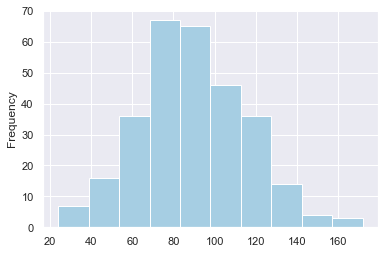

In [85]:
df6_edited=pd.read_csv(r'/Users/christopherjose/Desktop/Work/Projects/2020/df6_weights.csv')
df6_edited.weight.plot(kind='hist') #before nan imputation
df6_edited['I_weight']=df6_edited['weight'].isnull().astype(int) #nan or Varies by Retailer entries
df6_edited['weight']=df6_edited.weight.fillna(value=df6_edited.weight.median(),inplace=False)

## Height Wrangling

In [837]:
df6_edited.to_csv(r'/Users/christopherjose/Desktop/Work/Projects/2020/df6_heights.csv', index = False)

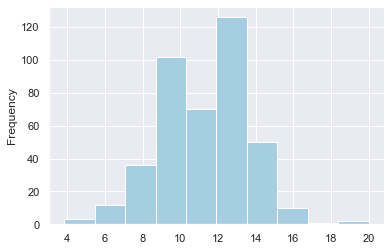

In [86]:
df7=pd.read_csv(r'/Users/christopherjose/Desktop/Work/Projects/2020/df6_heights_revised.csv')
df7.height.plot(kind='hist')
df7['I_height']=df7['height'].isnull().astype(int) #nan or Varies by Retailer entries
df7['height']=df7.height.fillna(value=df7.height.median(),inplace=False)

## Mattress Type Wrangling

In [400]:
df7.type.value_counts()

Foam                            162
Hybrid                          131
Innerspring                      75
Latex                            60
Airbed                            7
Innersping                        1
Hybrid, Innerspring and Foam      1
Coil                              1
Air                               1
Fiber                             1
Varies                            1
Name: type, dtype: int64

In [87]:
df7.loc[df7.type=='Hybrid, Innerspring and Foam','type']='Hybrid'
df7.loc[df7.type=='Coil','type']='Innerspring'
df7.loc[df7.type=='Innersping','type']='Innerspring'
df7.loc[df7.type=='Air','type']='Smart/Other'
df7.loc[df7.type=='Airbed','type']='Smart/Other'
df7.loc[df7.type=='Fiber','type']='Smart/Other'
df7.loc[df7.type=='Varies','type']='Smart/Other'
df7.type.value_counts()

Foam           162
Hybrid         132
Innerspring     77
Latex           60
Smart/Other     10
Name: type, dtype: int64

## Price Wrangling

In [88]:
df7['price'] = df7.price.str.strip('$').str.strip('*')
df7['I_price']=df7['price'].isnull().astype(int) #nan or Varies by Retailer entries
df7['price']=df7.price.fillna(value=df7.price.median(),inplace=False)

## Preparing Dataset for EDA

In [89]:
#Make dataframe with nulls remaining -> no median imputation
df8=df7.copy()
df8['price']=df8.price.astype('float')
df8['type']=df8.type.astype('str') #needs to be str for sns boxplot
df8.loc[df8.I_trial==1,'trial']=np.NaN
df8.loc[df8.I_firmness==1,'firmness']=np.NaN
df8.loc[df8.I_weight==1,'weight']=np.NaN
df8.loc[df8.I_height==1,'height']=np.NaN
df8.loc[df8.I_price==1,'price']=np.NaN

In [76]:
df8.to_csv(r'/Users/christopherjose/Desktop/Work/Projects/2020/df_eda.csv', index = False)

## Preparing Dataset for Model Building

In [126]:
#we still have null price values
df8.isnull().any(axis=0) #price has missings
df8.loc[df8.isnull()['price']==True].head()  #most price missings have other missings too except Lucid
df8.loc[(df8.brand=='Lucid') & (df8.model=='14″ Gel Memory Foam'),'price']=552.24 #price shown at walmart (bed has same weight) 
#https://www.walmart.com/ip/Lucid-14-Memory-Foam-Mattress-Triple-Layer-Queen/47904225?selected=true
df9=df8.drop(df8.loc[df8.I_price==1].index) #drop all 55 NAN price rows (huge chunk of dataset)
df9=df9.drop(['I_price'],axis=1)

brand         False
model          True
price          True
type          False
height         True
weight         True
firmness       True
trial          True
I_trial       False
I_firmness    False
I_weight      False
I_height      False
I_price       False
dtype: bool

,brand,model,price,type,height,weight,firmness,trial,I_trial,I_firmness,I_weight,I_height,I_price
48,Aireloom,Aspire,NaN,Hybrid,NaN,NaN,NaN,NaN,1,1,1,1,1
49,Aireloom,Preferred,NaN,Hybrid,NaN,NaN,NaN,NaN,1,1,1,1,1
50,Aireloom,Rip Van Winkle,NaN,Hybrid,NaN,NaN,NaN,NaN,1,1,1,1,1
51,Aireloom,Synchronized Support,NaN,Hybrid,NaN,NaN,NaN,NaN,1,1,1,1,1
73,Bob-O-Pedic,6,NaN,Foam,6.0,NaN,NaN,90.0,0,1,1,0,1


In [127]:
df9.to_csv(r'/Users/christopherjose/Desktop/Work/Projects/2020/df_model.csv', index = False)

## Preliminary Linear Regression!!  How is our result looking?!

In [524]:
df=df7.drop(['brand','model','I_price'],axis=1)
df['price']=df.price.astype('float')
df=pd.get_dummies(df)

In [530]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['price'],axis=1), df.price, test_size=0.4, random_state=1)

In [531]:
X_train2=X_train.iloc[:,[0,5,6,7,8,9,10,11,12]]
m = ols('y_train ~ X_train2', X_train2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     17.29
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.65e-20
Time:                        10:12:58   Log-Likelihood:                -2151.3
No. Observations:                 264   AIC:                             4321.
Df Residuals:                     255   BIC:                             4353.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -514.9133    271.982     -1.893      0.059   -1050.530      20.703
X_train2[0]   179.9755     27.711      6.495      0.000     125.403     234.548
X_train2[1]  -188.5750    140.912     -1.338      0.182    -466.075      88.925
X_train2[2]   717.0946    132.230      5.423      0.000     456.693     977.496
X_train2[3]  -617.4256    244.043     -2.530      0.012   -1098.021    -136.830
X_train2[4]  -561.3245    120.265     -4.667      0.000    -798.164    -324.485
X_train2[5]  -302.6536    151.626     -1.996      0.047    -601.253      -4.054
X_train2[6]  -823.3903    157.387     -5.232      0.000   -1133.334    -513.447
X_train2[7]   543.5511    151.280      3.593      0.000     245.635     841.468
X_train2[8]   628.9040    420.042      1.497      0.136    -198.290    1456.098
==============================================================================
Omnibus:                      130.237   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.934
Skew:                           2.007   Prob(JB):                    2.72e-142
Kurtosis:                       9.569   Cond. No.                     1.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [532]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('y_train ~ X_train', X_train).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     12.18
Date:                Thu, 07 May 2020   Prob (F-statistic):           2.07e-19
Time:                        10:13:02   Log-Likelihood:                -2147.9
No. Observations:                 264   AIC:                             4322.
Df Residuals:                     251   BIC:                             4368.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -151.6819    470.361     -0.322      0.747   -1078.039     774.675
X_train[0]    142.7457     32.374      4.409      0.000      78.986     206.506
X_train[1]      5.4018      3.193      1.692      0.092      -0.887      11.691
X_train[2]    -73.9834     57.461     -1.288      0.199    -187.151      39.184
X_train[3]     -0.5945      0.783     -0.759      0.448      -2.137       0.948
X_train[4]    -48.2103    176.922     -0.272      0.785    -396.651     300.230
X_train[5]   -144.7277    158.190     -0.915      0.361    -456.276     166.820
X_train[6]    687.2247    134.990      5.091      0.000     421.367     953.082
X_train[7]   -633.4382    247.319     -2.561      0.011   -1120.524    -146.352
X_train[8]   -450.3924    135.935     -3.313      0.001    -718.110    -182.675
X_train[9]   -238.2022    177.026     -1.346      0.180    -586.847     110.443
X_train[10]  -690.8591    180.021     -3.838      0.000   -1045.404    -336.314
X_train[11]   500.1669    175.155      2.856      0.005     155.207     845.127
X_train[12]   727.6049    431.136      1.688      0.093    -121.499    1576.709
==============================================================================
Omnibus:                      128.794   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.178
Skew:                           1.995   Prob(JB):                    1.76e-136
Kurtosis:                       9.397   Cond. No.                     1.55e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model Development

I will have to redo median imputation for each split to avoid data leakage from test to train.